# Credit Card Fraud Detection - Exploratory Data Analysis (EDA)

## Introduction

This notebook focuses on performing an exploratory data analysis (EDA) on the credit card transaction dataset. The goal is to gain insights into the data and understand the characteristics of fraudulent and non-fraudulent transactions. Given the highly imbalanced nature of the dataset, we will focus on investigating patterns in fraud cases compared to regular transactions.

### Dataset Overview

- **Number of transactions**: 284,807
- **Number of fraud cases**: 492
- **Fraud to Non-fraud ratio**: ~0.172%
- **Features**: 
  - `Time`: Time in seconds between the current and the first transaction.
  - `Amount`: Transaction amount.
  - `V1` to `V28`: Principal components from a PCA transformation.
  - `Class`: Target variable (1 = Fraud, 0 = Non-Fraud).

---

### Analysis Goals:
- Understand the class distribution.
- Analyze the relationship between different features and fraud.
- Visualize patterns in fraud detection, focusing on differences in transaction amounts, time, and other variables.

---

## Step 1: Basic Data Exploration

In this section, we will perform basic exploration of the dataset to understand its structure and key statistics. We will start with answering the following beginner questions:
- How many transactions are there in the dataset?
- What is the ratio of fraudulent to non-fraudulent transactions?
- What are the basic statistics of the `Amount` and `Time` columns?
- Are there any missing values in the dataset?
- Visualize the distribution of transaction amounts.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
data = pd.read_csv('../data/raw/creditcard.csv')

In [7]:
# Display all columns of the dataset
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Question 1: How many transactions are there in the dataset?
num_transactions = data.shape[0]
print(f"Number of transactions: {num_transactions}")

Number of transactions: 284807


In [9]:
# Question 2: What is the ratio between fraudulent and non-fraudulent transactions?
fraud_count = data['Class'].value_counts()
fraud_ratio = fraud_count[1] / num_transactions * 100
print(f"Fraud to Non-fraud ratio: {fraud_ratio:.4f}%")

Fraud to Non-fraud ratio: 0.1727%


In [10]:
# Question 3: Basic statistics of 'Amount' and 'Time'
amount_stats = data['Amount'].describe()
time_stats = data['Time'].describe()
print(f"Amount stats: \n{amount_stats}")
print(f"Time stats: \n{time_stats}")

Amount stats: 
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64
Time stats: 
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


In [11]:
# Question 4: Are there any missing values in the dataset?
missing_values = data.isnull().sum()
print(f"Missing values: \n{missing_values}")

Missing values: 
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


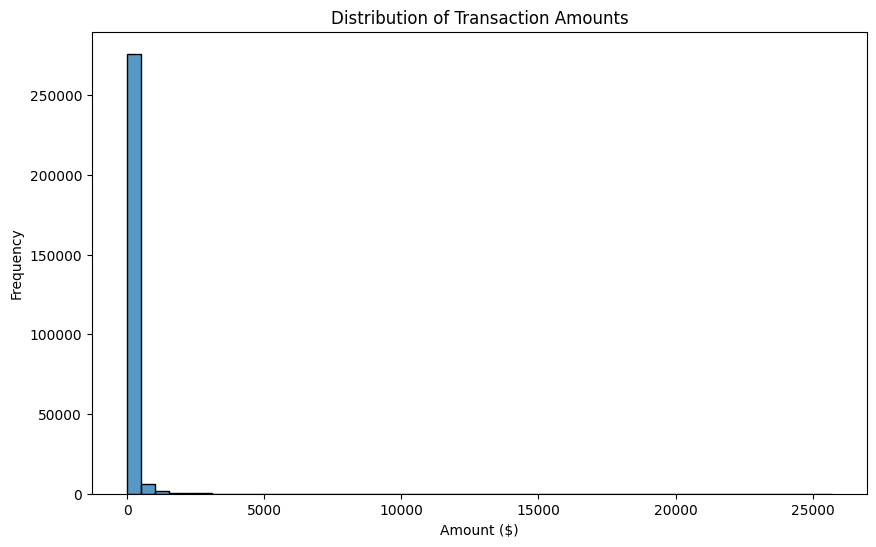

In [12]:
# Question 5: Visualize the distribution of 'Amount'
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=False)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()

## Step 2: Intermediate Data Exploration

- Does the `Time` variable have any relation to fraudulent transactions? (e.g., are fraudulent transactions more likely to occur at certain times of the day?)
- Are there any significant correlations between `Amount`, `Time`, and the PCA-transformed features (V1 to V28) for fraudulent transactions?
- Create boxplots or violin plots to see if there are visible differences in the PCA-transformed features (V1 to V28) between fraud and non-fraud transactions.

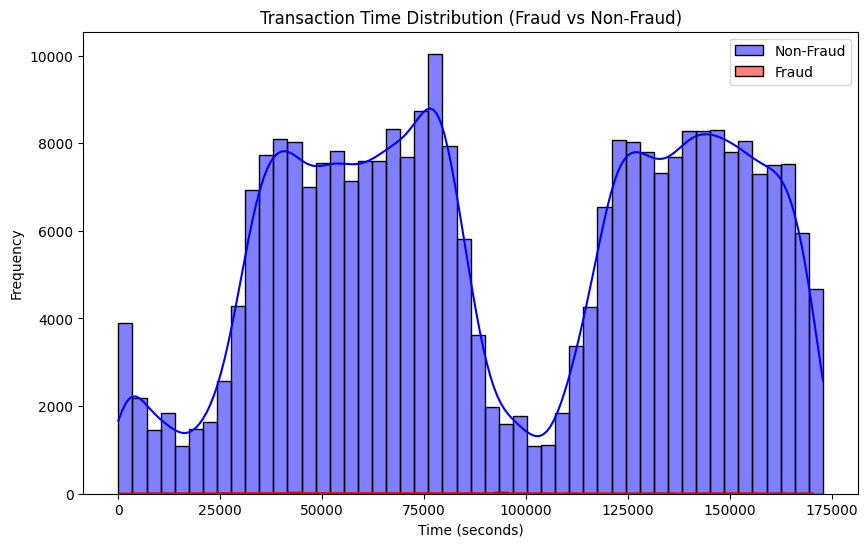

In [13]:
# Visualize the distribution of the 'Time' variable for both fraud and non-fraud transactions
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['Time'], bins=50, color='blue', label='Non-Fraud', kde=True)
sns.histplot(data[data['Class'] == 1]['Time'], bins=50, color='red', label='Fraud', kde=True)
plt.title('Transaction Time Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

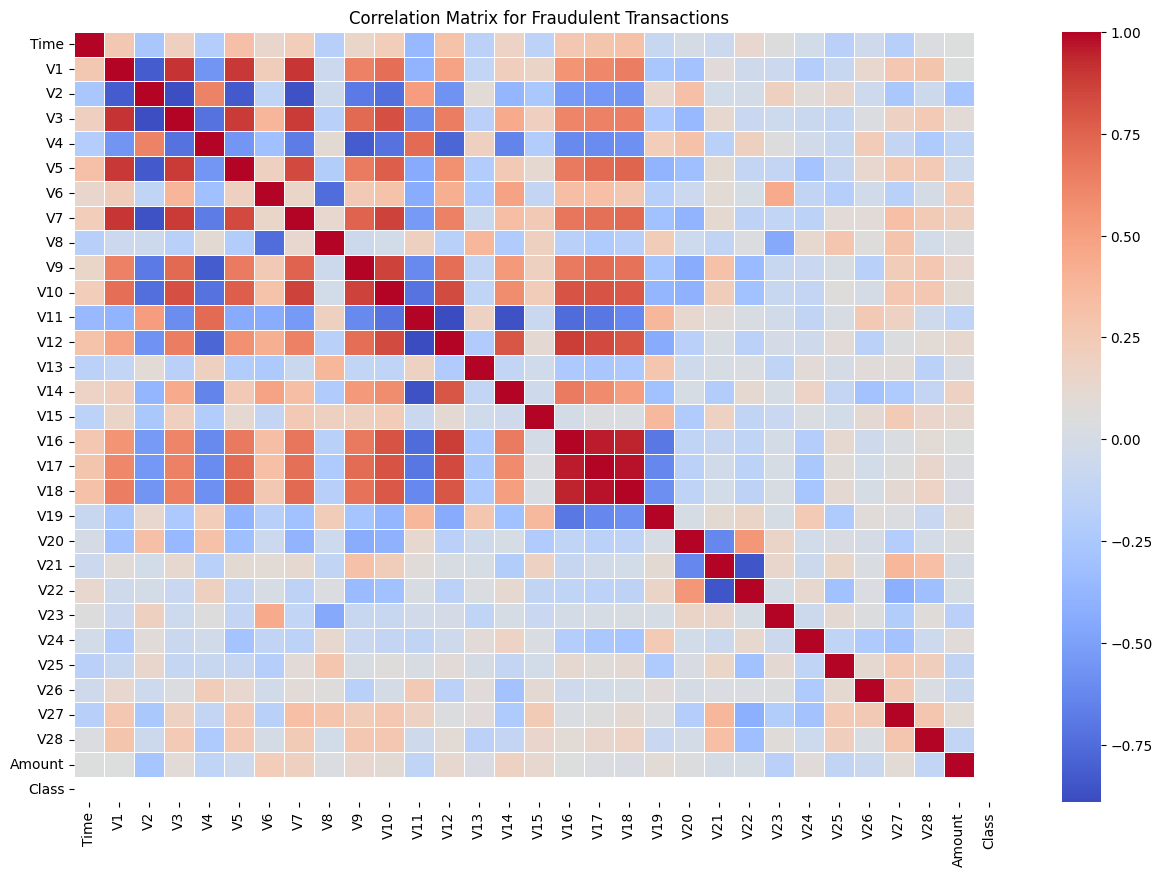

In [14]:
# Correlation matrix for fraudulent transactions
fraud_data = data[data['Class'] == 1]  # Subset of fraudulent transactions
corr_matrix = fraud_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Fraudulent Transactions')
plt.show()

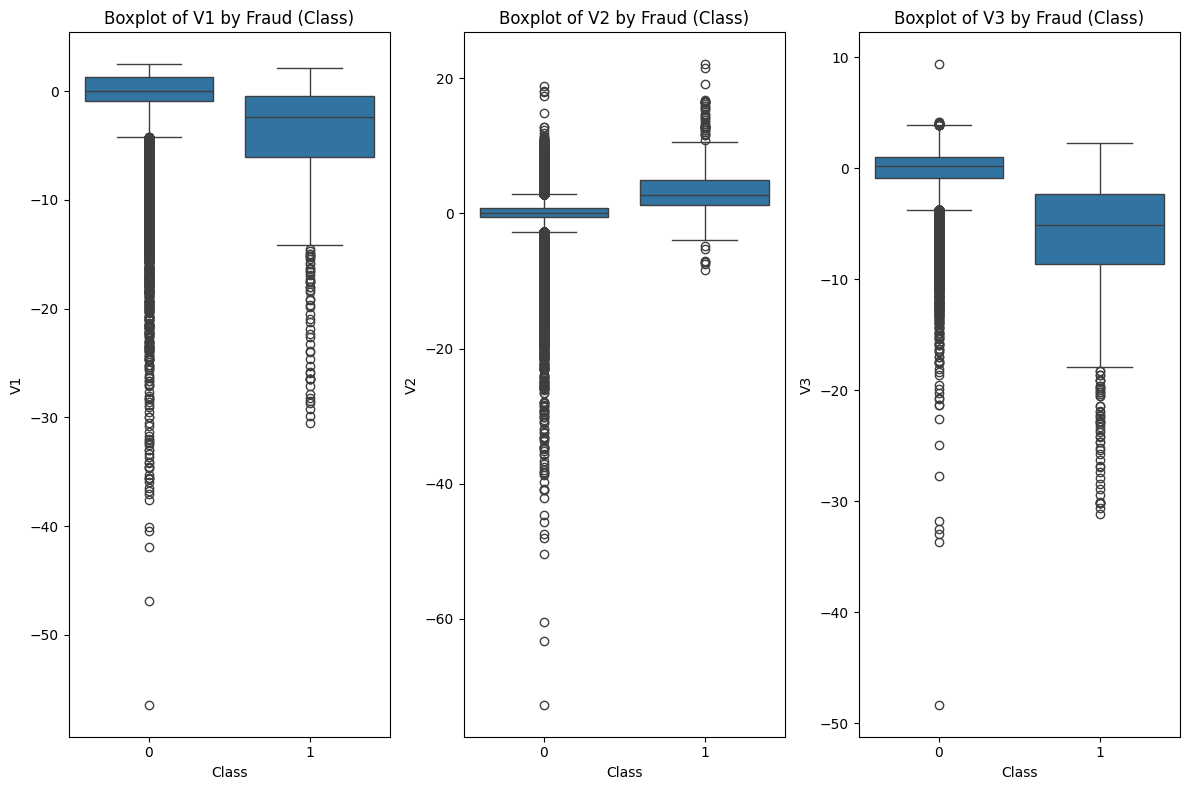

In [15]:
# Visualize differences between fraud and non-fraud for a few PCA-transformed features (V1 to V3)
plt.figure(figsize=(12, 8))

for i, feature in enumerate(['V1', 'V2', 'V3'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Class', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Fraud (Class)')
    
plt.tight_layout()
plt.show()

## Step 3: Advanced Data Exploration

- Perform a **Principal Component Analysis (PCA)** on the dataset. How much variance is explained by the first few components? Does dimensionality reduction highlight any patterns between fraudulent and non-fraudulent transactions?
- Use **t-SNE** or **UMAP** to visualize the fraud vs. non-fraud transactions in lower-dimensional space. Are there any separations between the two classes?
- Can clustering algorithms like **K-Means** or **DBSCAN** help in distinguishing fraud from non-fraud transactions? Visualize the clusters and check their correlation with the `Class` column.
- Analyze the class imbalance. What impact might it have on your machine learning model? Consider advanced techniques like SMOTE to handle it.

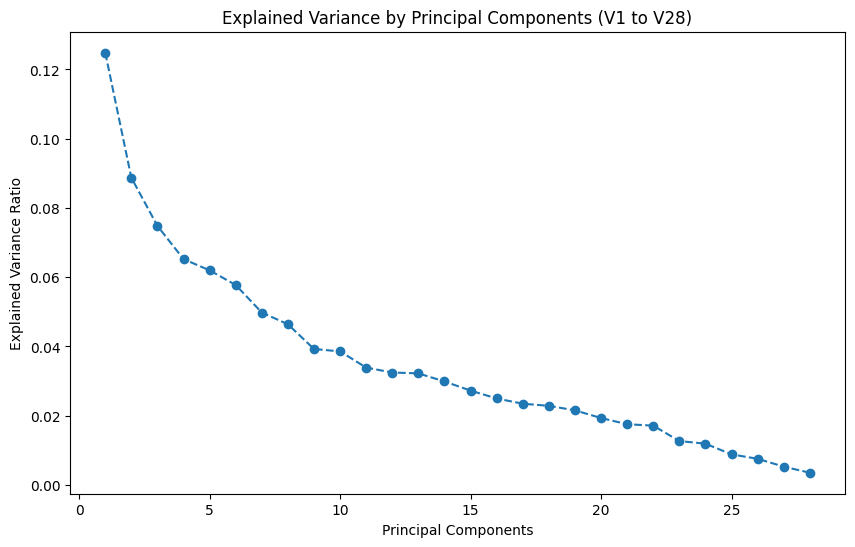

Cumulative explained variance: 
[0.12483757 0.21356702 0.28837636 0.35360784 0.41559829 0.47335421
 0.52315273 0.56956969 0.60884466 0.64742333 0.68132481 0.71381239
 0.7460451  0.77594586 0.80320759 0.82819207 0.85166522 0.87452552
 0.89608823 0.91542731 0.93298321 0.95011992 0.96280874 0.97474451
 0.9835865  0.99115334 0.99645466 1.        ]


In [16]:
from sklearn.decomposition import PCA

# Extract the PCA-transformed features (V1 to V28)
pca_features = data.loc[:, 'V1':'V28']

# Apply PCA
pca = PCA()
pca.fit(pca_features)

# Plot the explained variance ratio of each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, 29), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components (V1 to V28)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(f'Cumulative explained variance: \n{cumulative_variance}')

In [18]:
from sklearn.manifold import TSNE

# Applying t-SNE on the PCA-transformed features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pca_features)

# Add t-SNE results to the dataset
data['t-SNE1'] = tsne_results[:, 0]
data['t-SNE2'] = tsne_results[:, 1]

# Plot t-SNE results for Fraud vs Non-Fraud
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Class', palette='coolwarm', data=data)
plt.title('t-SNE Visualization of Fraud vs Non-Fraud Transactions')
plt.show()

KeyboardInterrupt: 

In [19]:
import umap

# Applying UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_results = umap_model.fit_transform(pca_features)

# Add UMAP results to the dataset
data['UMAP1'] = umap_results[:, 0]
data['UMAP2'] = umap_results[:, 1]

# Plot UMAP results for Fraud vs Non-Fraud
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Class', palette='coolwarm', data=data)
plt.title('UMAP Visualization of Fraud vs Non-Fraud Transactions')
plt.show()

/Users/dazzpool/Documents/Github/creditCardFraudDetection/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/dazzpool/Documents/Github/creditCardFraudDetection/venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/dazzpool/Documents/Github/creditCardFraudDetection/venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans

# Applying K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(pca_features)

# Plot the K-Means clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='KMeans_Cluster', palette='coolwarm', data=data)
plt.title('K-Means Clustering (2 Clusters) on t-SNE Results')
plt.show()

# Check how well the clusters align with fraud/non-fraud
cluster_fraud_alignment = pd.crosstab(data['KMeans_Cluster'], data['Class'])
print(cluster_fraud_alignment)

In [ ]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(pca_features)

# Plot DBSCAN clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='DBSCAN_Cluster', palette='coolwarm', data=data)
plt.title('DBSCAN Clustering on t-SNE Results')
plt.show()

In [ ]:
# Visualize class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Imbalance: Fraud vs Non-Fraud')
plt.show()

# Calculate the imbalance ratio
fraud_ratio = (data['Class'].value_counts()[1] / data['Class'].value_counts()[0]) * 100
print(f"Fraud-to-Non-Fraud ratio: {fraud_ratio:.4f}%")